<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2</h1>

-----

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **20% of the Total Course Grade**
|  **Submission deadline** |  **4:00PM, Friday, May 29th**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Penalty**             |  **100% after the deadline**


## Learning Outcomes
The following learning outcomes apply to this piece:
- **LO1** - Demonstrate a conceptual understanding of database systems and architecture, data models and declarative query languages
- **LO2** - Define, query and manipulate a relational database
- **LO3** - Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- **LO4** - Formulate and extract descriptive and predictive statistics from data
- **LO5** - Analyse and interpret results from descriptive and predictive data analysis
- **LO6** - Apply their knowledge to a given problem domain and articulate potential data analysis problems
- **LO7** - Identify potential pitfalls, and social and ethical implications of data science
- **LO8** - Explain key security concepts and the use of cryptographic techniques, digital signatures and PKI in security


## Submission

You need to submit the following items:
- The notebook `Assignment-2-uXXXXXXX.ipynb` (where uXXXXXXX is your uid) 
- A completed `statement-of-originality.md`, found in the root of the forked gitlab repo.

Submissions are performed by pushing to your forked GitLab assignment repository. For a refresher on forking and cloning repositories, please refer to `Lab 1`. Issues with your Git repo (with the exception of a CECS/ANU wide Gitlab failure) will not be considered as grounds for an extension. Any variation of this will result in a `zero mark`.

***** 

### Notes:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.
* Backup your assignment to your Gitlab repo often. 
* Extra reading and research will be required. Make sure you include all references in your Statement of Originality. If this does not occur, at best marks will be deduced. Otherwise, academic misconduct processes will be followed.
* For answers requiring free form written text, use the designated cells denoted by `YOUR WRITTEN ANSWER HERE` -- double click on the cell to write inside them.
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively. You are welcome to add additional cells to the final submission, provided they add value to the overall piece.
* Your code answers will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 
* Your written answers will be marked on the **correctness**, **depth** and **clarity** of your written answers. If your marker cannot understand your answer, marks may be deducted
* Before submitting, restart the kernel in Jupiter Lab and re-run all cells before submitting your code. This will ensure the namespace has not kept any old variables, as these won't come across in submission and your code will not run. Without this, you could lose a significant number of marks.
* For written responses, a word limit of 300 words per question applies. There is no minimum word count. After 300 words, the tutors will stop reading your response, marking what has already been said.

*****

## Introduction

This introduction has been split into three sections, based on the datasets you will be interacting with: **CVE revisited**, **BikeStores**, and **Rumble**.

<br>

### CVE revisited
Sound familiar? We hope so. You are being provided another sample of the NVD CVE dataset from the first assignment, although for a different year. For a refresher, go check the [about.md](./data/cve/about.md) file.

<br>

### BikeStores
To test your SQL muscles, we have provided a database (and the creation scripts) for a sample SQL database called [BikeStores](https://www.sqlservertutorial.net/sql-server-sample-database/). The BikeStores database is modeled off a retail store selling bicycles. We have provided the Database diagram in Q3 for reference.

<br>

### Rumble
One of the goals of this course was to introduce you to a multitude of different scenarios and datasets, and this assignment will be no exception.

The WWE Royal Rumble (Further Reading: [Wikipedia](https://en.wikipedia.org/wiki/Royal_Rumble) or [wwe.com](https://www.wwe.com/shows/royalrumble)) is an annual [professional wrestling](https://en.wikipedia.org/wiki/Professional_wrestling) event put on by the [World Wrestling Entertainment (WWE)](https://en.wikipedia.org/wiki/WWE). At the event, the marque match is a 30-man (or now woman!) "battle royale". (If none of this makes sense, don't worry. We're about to explain it.)

#### What is professional wrestling?
Professional Wrestling is a form of entertainment, quite popular in the United States and Japan. "Wrestlers" will "fight" in "matches", which are aimed to combine theater and athleticism. Matches are predetermined, participants are all willing, and the main aim is to entertain the audience. ([Further Reading](https://entertainment.howstuffworks.com/pro-wrestling.htm)).

#### So what is a "Royal Rumble"?
The "Royal Rumble" is a type of match that has 3 rules:
- Everyone gets allocated an entrance number (so, you start with 2 and new entries come in every so often).
- Only way to get rid of someone is to throw them out of the ring.
- Last person standing wins.

#### So, what has this got to do with the assignment?
Good question! All of the above is background information so you understand the dataset. In the interests of assessing your data handling, manipulation and SQL skills, you are going to be implementing an SQL database from the csv data files provided.

*****
## Data Description
You have three (3) datasets to work with in this assignment, broken down as follows:

- Question 1 - CVE
- Question 3 - BikeStores
- Question 4 - Rumble

Once again, the CVE dataset is a sizable dataset (roughly 8000 rows and 24 columns), so it is wise to consider your code in terms of complexity to ensure it doesn't take 30 minutes to run a single line.

Further reading on the datasets can be found in the following locations:
- [CVE about.md](./data/cve/about.md)
- [BikeStores about.md](./data/bikestores/about.md)
- [Rumble about.md](./data/rumble/about.md)

****

In [1]:
# Code Imports
# Every Lab import is here, you may need to uncomment additional items as necessary.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sqlite3 import Error
#from scipy import stats
#from sklearn.linear_model import LogisticRegression     # Logistic Regression
#from sklearn.neighbors import KNeighborsClassifier      # k-Nearest Neighbours
from sklearn.preprocessing import LabelEncoder          # encooding variables
from sklearn.preprocessing import StandardScaler        # encooding variables
from sklearn.model_selection import train_test_split    # testing our models
#from sklearn.preprocessing import OneHotEncoder         # nominal variable
#from sklearn.metrics import confusion_matrix            # scoring
#from sklearn.tree import DecisionTreeClassifier         # decision trees
#from sklearn.tree import DecisionTreeRegressor          # decision trees
#from sklearn import tree                                # decision trees
from sklearn.decomposition import PCA                   # PCA 
from sklearn.cluster import KMeans                      # KMeans Clustering

In [2]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules, however we had added space here just in case you feel 
#     extras are required. Note that some justification as to WHY you are using them should be provided.
#
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.
#
#

****
## Q1: Probing Products (25 marks)
Building off the dataset you initially encountered in Assignment 1, the CVE dataset has made a return for the following question. Note that while the dataset holds the same schema, the Base Scores have been included, and the data is from a different year (2018).

The following question is designed to get you to load and process data, and implement a clustering model for the given scenario below. You have been introduced to `KMeans` clustering in the lectures and labs and this would therefore be the assumed clustering method, although you are welcome to supplement this with other clustering methods from the `sklearn` package as you desire.

Your scenario is as follows:
> Once again, you have assumed the role of a member of a cyber-security team interested in the vulnerability of products. One of your colleagues developed a heuristic that could be used to group CVE entries into relative risk groups that highlight which vulnerabilities need to be patched in products. While this is useful for determining which vulnerabilities should be patched for products that are already within the system, your software procurement team wants to know if there are any products to avoid when buying new products. 
>
> Your procurement team has asked you to develop an automated modelling system (ie: clustering model) to identify software that can be grouped based on their risk. You must decide how many groupings, and what risk level (for example, High, Medium or Low) is appropriate for each group. Risk could be based on the number of CVEs and CVSS v2 metrics that can be associated to a product. The procurement team does not wish to use the CVSS Base Score metric as a clustering metric. They are also only interested in products with more than 3 entries, otherwise they predict there will be bias in the results. Finally, they are only interested in using the CVSS v2 system. 
>
> Based on this clustering model, the procurement team will make risk-based decisions to determine whether it is safe to introduce a product to the system.

You will first be asked to import and pre-process the data ready to implement a clustering model. Then, you are on your own in the world of clustering. Good luck!

### 1.1 Preprocessing
To start off, bring in the data and get it ready for clustering. Your tasks are:

1. Import the Data. The dataset is available in the location `data/cve/nvdcve18.csv` <span style= 'float: right;'><b>[1 mark]</b></span>
2. Prepare the data for a clustering task. You are welcome to use the data processing code that you wrote for the previous assignment.

**Note:** While not every part of this section is not directly assessed, you have a number of tasks that will aid in your clustering and data analysis in future questions.

In [3]:
# YOUR CODE HERE
cve_db = pd.read_csv("data/cve/nvdcve18.csv")
cve_db.drop(['v3_attackComplexity','v3_attackVector','v3_availabilityImpact','v3_confidentialityImpact','v3_integrityImpact',
             'v3_baseScore','v3_privilegesRequired','v3_scope','v3_userInteraction','product.description','reference.url','product.versions'],axis=1,inplace = True)
cve_db.dropna(inplace = True)

def change_AceC(level):
    '''Change the v2_accessComplexity to numerical values
    '''
    if level == "HIGH":
        return 0.35
    elif level == "MEDIUM":
        return 0.61
    elif level == "LOW":
        return 0.71
    else:
        return 0
    
def change_AceV(level):
    '''Change the v2_accessVector to numerical values
    '''
    if level == "LOCAL":
        return 0.395
    elif level == "ADJACENT_NETWORK":
        return 0.646
    elif level == "NETWORK":
        return 1
    else:
        return 0
    
def change_Auth(level):
    '''Change the v2_authentication to numerical values
    '''
    if level == "MULTIPLE":
        return 0.45
    elif level == "SINGLE":
        return 0.56
    elif level == "NONE":
        return 0.704
    else:
        return 0 

def change_2_CIA(level):
    '''Change the v2_availabilityImpact,v2_confidentialityImpact,v2_integrityImpact to numerical values
    '''
    if level == "COMPLETE":
        return 0.66
    elif level == "PARTIAL":
        return 0.275
    else:
        return 0
    
# CVSS v2 initialization part-------------------------------------------------------------------------------------------------------------------------------------
    
cve_db["v2_accessComplexity"] = cve_db["v2_accessComplexity"].apply(change_AceC)

cve_db["v2_accessVector"] = cve_db["v2_accessVector"].apply(change_AceV)

cve_db["v2_authentication"] = cve_db["v2_authentication"].apply(change_Auth)

cve_db["v2_availabilityImpact"] = cve_db["v2_availabilityImpact"].apply(change_2_CIA)
cve_db["v2_confidentialityImpact"] = cve_db["v2_confidentialityImpact"].apply(change_2_CIA)
cve_db["v2_integrityImpact"] = cve_db["v2_integrityImpact"].apply(change_2_CIA)
cve_db.head()
# (ANY ADDITIONAL CELLS AS REQUIRED)

,product.name,cve.id,vendor.name,cwe.id,v2_accessComplexity,v2_accessVector,v2_authentication,v2_availabilityImpact,v2_confidentialityImpact,v2_integrityImpact,v2_baseScore,capec.classes
0,junos,CVE-2018-0001,juniper,CWE-416,0.71,1.000,0.704,0.275,0.275,0.275,7.5,No Known CAPECS
1,junos,CVE-2018-0002,juniper,CWE-119,0.61,1.000,0.704,0.275,0.000,0.000,4.3,"CAPEC-2, CAPEC-273, CAPEC-507, CAPEC-42, CAPEC..."
2,junos,CVE-2018-0003,juniper,NVD-CWE-noinfo,0.71,0.646,0.704,0.660,0.000,0.000,6.1,No Known CAPECS
3,junos,CVE-2018-0004,juniper,CWE-400,0.61,1.000,0.704,0.660,0.000,0.000,7.1,"CAPEC-50, CAPEC-322, CAPEC-101"
4,junos,CVE-2018-0005,juniper,CWE-754,0.71,0.646,0.704,0.275,0.275,0.275,5.8,No Known CAPECS


### 1.2 Building a Clustering Model
Based on the scenario above, create a clustering model to group products within the CVE dataset by the risk they may pose. Ensure that:
1. You include a detailed visualisation of the clusters. 
2. You choose an appropriate number of clusters. 

You should consider whether normalisation and any other data processing steps explored in this course are appropriate for this task.
<span style= 'float: right;'><b>[10 marks]</b></span>

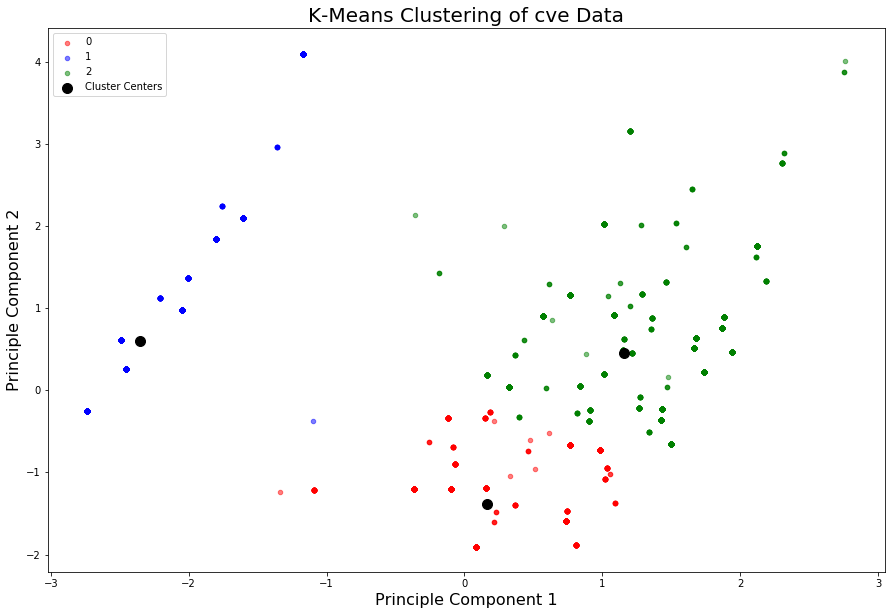

In [4]:
# YOUR CODE HERE
cve_db['vendor.name'] = LabelEncoder().fit_transform(cve_db['vendor.name'])
cve_db['cve.id'] = LabelEncoder().fit_transform(cve_db['cve.id'])
cve_db['product.name'] = LabelEncoder().fit_transform(cve_db['product.name'])

std = StandardScaler()
std_cve_db = std.fit_transform(cve_db[['v2_accessComplexity','v2_accessVector','v2_authentication',
                             'v2_availabilityImpact','v2_confidentialityImpact','v2_integrityImpact']])

pca2 = PCA(n_components=2)
cve_reduced = pca2.fit_transform(std_cve_db)
kmc = KMeans(n_clusters=3)
kmc.fit(cve_reduced)

cve_db['level'] = kmc.labels_


# feel free to change the colours to your liking
colors=["red","blue","green","purple","orange","black","yellow"]

# plotting with different coloured clusters and showing cluster centres
plt.figure(figsize=(15,10))
for i in range(np.max(kmc.labels_)+1):
    plt.scatter(cve_reduced[kmc.labels_== i][:,0], cve_reduced[kmc.labels_==i][:,1], label=i, c=colors[i], alpha=0.5,s=20)
plt.scatter(kmc.cluster_centers_[:,0], kmc.cluster_centers_[:,1], label='Cluster Centers', c="black", s=100)
plt.title("K-Means Clustering of cve Data",size=20)
plt.xlabel("Principle Component 1", size=16)
plt.ylabel("Principle Component 2", size=16)
plt.legend()
plt.show()
# (ANY ADDITIONAL CELLS AS REQUIRED)

### 1.3 Analysing the Clusters
With your clustering model complete, analyse the outputs in preparation for showing the results to the procurement team. Your tasks are as follows:

#### 1.3.1 Comparison of scores
1. Compare the mean of each CVSS v2 metric, including the CVSS v2 Base Score, between all clusters in your model. 
2. Identify and explain the largest differences in these metrics between the clusters (i.e. what are the defining characteristics of a cluster compared to other cluster(s)?). Ensure that you compare the average CVSS v2 Base Score between each cluster as well.

<span style= 'float: right;'><b>[5 marks]</b></span>

In [5]:
# YOUR CODE HERE

cve_db_group = cve_db.groupby('level').apply(np.mean)
cve_db_group[['v2_accessComplexity','v2_accessVector','v2_authentication','v2_availabilityImpact','v2_confidentialityImpact','v2_integrityImpact','v2_baseScore']]

# (ANY ADDITIONAL CELLS AS REQUIRED)

,v2_accessComplexity,v2_accessVector,v2_authentication,v2_availabilityImpact,v2_confidentialityImpact,v2_integrityImpact,v2_baseScore
level,,,,,,,
0,0.697849,0.427217,0.704000,0.329201,0.196180,0.089624,4.294260
1,0.676107,0.633046,0.693775,0.660000,0.660000,0.659740,8.021775
2,0.657177,0.988698,0.674610,0.168312,0.178077,0.172499,5.541531


#### 1.3.2 Comparison of scores
1. Visualise the distribution of the CVSS2 Score between each cluster. 
2. Answer the following: Without the use of a hypothesis test, does the CVSS2 Score appear to differ significantly between these clusters? (You may reference the previous question rather than reproducing answers)

<span style= 'float: right;'><b>[4 marks]</b></span>

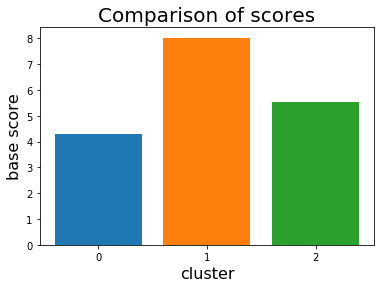

In [6]:
# YOUR CODE HERE
cluster_baseScore = cve_db_group['v2_baseScore']
plt.bar(0,cluster_baseScore[0])
plt.bar(1,cluster_baseScore[1])
plt.bar(2,cluster_baseScore[2])
plt.title("Comparison of scores",size=20)
plt.xlabel("cluster", size=16)
plt.ylabel("base score", size=16)
plt.xticks([0,1,2],["0", "1", "2"])
plt.show()
# (ANY ADDITIONAL CELLS AS REQUIRED)

### 1.4 Convincing the Procurement Team
With your evidence and analysis points well defined, it is now time to present your model and findings to the procurement team.

Explain your model, your reasoning for using the particular CVSS metrics as described in the initial context and which you used in Q1.2, and how this model could be used when they are determining what software should be purchased. Include an example of a product in your explanation.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [7]:
# Code box if needed.


*****
## Q2: Eager for Ethics (10 marks)
While Data Scientists and Data Engineers spend a lot of timing thinking about how to solve a problem, it is important to think about _why_ we solve a problem and what impacts it could have. For the following scenarios, provide a written response to the questions.

### 2.1: Scenario One
> Blume, an organisation at the forefront of technology, has recently hired you as a Data Analyst. In your induction, you discover Blume works with a number of government and private industry organisations in data handling processes, while maintaining a copy of the data. This data is then collected, analysed and indiscriminately sold on to a number of other organisations who have used the data to perform a number of questionable practices. These practices include: adjusting prices of health insurance premiums based on a person's eating habits, adjusting rent prices based on income, predictive policing, and selective advertising. 

What are some of the potential ethical issues that could arise in Blume's business practices? What harms _could_ arise from the outcomes of Blume's business dealings? Provide examples in your response to the questions.
<span style= 'float: right;'><b>[4 marks]</b></span>

### 2.2: Scenario One (cont.)
As a data analyst for the company, what should you be conscious of when working there and handling the sensitive data that you could be exposed to?
<span style= 'float: right;'><b>[3 marks]</b></span>

### 2.3: Scenario Two
> You've now been working as a Data Analyst at Blume for over a year, and recently Blume has been featured in the news for unethical business practices. A whistle-blower organisation, DedSec, formally approaches you individually, offering to pay you for access to Blume's data. DedSec claims that _"we will be the watch dogs"_, reviewing Blume's practices from inside their systems and reporting any issues they find publicly.

Discuss the ethical issues with letting DedSec have access to Blume's systems. Provide examples in your response.
<span style= 'float: right;'><b>[3 marks]</b></span>

*****
## Q3: Serious SQL (20 marks)
Consider the following scenario.

> You are applying for a job as a database developer for an unnamed wrestling company. Part of the job description includes creating an automation system for running SQL queries. During the hiring process, the interviewers want to ensure you understand the SQL language. They have provided a set of questions to be answered by you, and your responses will later be reviewed by them. They are unwilling to give you access to their real database (which is mysteriously missing), so they have provided an SQLite3 database and asked you to interact with it using Python. 


Based on the above scenario, you have been asked to answer a number of questions to test your skills. You will be using the BikeStores database for this question. The database model is as follows:

![bikestores_example](./img/bikestore_database.png)


**Note:** You will notice the above diagram uses a different ER notation than described in the lectures. The lecture slides use [Chen's Notation](https://www.vertabelo.com/blog/chen-erd-notation/), while this diagram uses [Crow's Foot Notation](https://www.vertabelo.com/blog/crow-s-foot-notation/). Either is acceptable in this instance. For a quick intro to crow's foot notation, check out this [LucidChart reference page](https://www.lucidchart.com/pages/ER-diagram-symbols-and-meaning).

In the following questions, you will be asked to execute the SQL statement, and explain any reasoning as necessary. Data can be formatted as raw printed output or a Pandas DataFrame. Recall the use of the `fetchone` and `fetchall` functions on an sqlite cursor for retriving information.

In [8]:
# THIS IS YOUR CONNECTION BLOCK, DO NOT MODIFY THIS. 
# OTHERWISE, YOU WILL NOT BE ABLE TO READ THE DATABASE
def create_connection(db_file):
    """ Connect to the specified SQLite database, if not exist, create a new one (in memory);
    :db_file: location of db to connect to
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("Connection established!")
    except Error as e:
        print("Error Connecting to Database")
        raise(e)
    return conn

dbfile_prod = "./data/bikestores/production.db"
dbfile_sales = "./data/bikestores/sales.db"
conn = create_connection(dbfile_prod) 
cur = conn.cursor()
cur.execute('attach database "' + dbfile_prod + '" as production;')
cur.execute('attach database "' + dbfile_sales + '" as sales;')
# remember to close the connection when everything is done

Connection established!


### 3.1: Customised Customers
List the number of customers in the database.
<span style= 'float: right;'><b>[2 marks]</b></span>

In [9]:
# Your Code Here

pd.read_sql_query('''SELECT COUNT(customer_id)
                     FROM (SELECT customer_id
                           FROM customers
                           GROUP BY customer_id);''',conn)

,COUNT(customer_id)
0,1445


### 3.2: Avoid the Coast
List the customers who **do not** live in the state of California (CA) **nor** the state of New York (NY).
<span style= 'float: right;'><b>[2 marks]</b></span>

In [10]:
# Your Code Here
pd.read_sql_query('''SELECT * 
                     FROM customers
                     WHERE state != 'CA' AND state != 'NY';''',conn)

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,13,Lashawn,Ortiz,None,lashawn.ortiz@msn.com,27 Washington Rd.,Longview,TX,75604
1,14,Garry,Espinoza,None,garry.espinoza@hotmail.com,7858 Rockaway Court,Forney,TX,75126
2,20,Aleta,Shepard,None,aleta.shepard@aol.com,684 Howard St.,Sugar Land,TX,77478
3,21,Tobie,Little,None,tobie.little@gmail.com,10 Silver Spear Dr.,Victoria,TX,77904
4,43,Mozelle,Carter,(281) 489-9656,mozelle.carter@aol.com,895 Chestnut Ave.,Houston,TX,77016
...,...,...,...,...,...,...,...,...,...
137,1363,Nestor,Haynes,(281) 969-4579,nestor.haynes@msn.com,27 Nut Swamp Street,Houston,TX,77016
138,1382,Wynona,Douglas,None,wynona.douglas@msn.com,6 Country Ave.,Harlingen,TX,78552
139,1417,Jasper,Castro,None,jasper.castro@aol.com,977 SE. Railroad Road,Forney,TX,75126
140,1423,Dollie,Cervantes,(682) 362-7457,dollie.cervantes@aol.com,8828 Applegate Drive,Fort Worth,TX,76110


### 3.3: Short on Stock
List the amount of stock available for the `Heller Shagamaw Frame - 2016` product in each store.
<span style= 'float: right;'><b>[2 marks]</b></span>

In [11]:
# Your Code Here

pd.read_sql_query('''SELECT store_name,quantity
                     FROM (SELECT store_id,quantity
                           FROM stocks NATURAL JOIN products
                           WHERE product_name = 'Heller Shagamaw Frame - 2016') NATURAL JOIN stores; ''',conn)

,store_name,quantity
0,Santa Cruz Bikes,22
1,Baldwin Bikes,1
2,Rowlett Bikes,3


### 3.4: Lost Shipments
List the earliest and latest order(s) (by order date) for order(s) that have not been shipped (ie: have no shipping date.)

Note: This should be performed in a single SQL query.
<span style= 'float: right;'><b>[3 marks]</b></span>

In [12]:
# Your Code Here
pd.read_sql_query('''SELECT * 
                     FROM orders
                     WHERE shipped_date IS NULL
                     ORDER BY order_date DESC;''',conn)

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1615,136,3,20181228,20181228,None,3,8
1,1614,135,3,20181128,20181128,None,3,8
2,1613,1,3,20181118,20181118,None,2,6
3,1612,3,3,20181021,20181021,None,1,3
4,1611,6,3,20180906,20180906,None,2,7
...,...,...,...,...,...,...,...,...
165,239,13,3,20160527,20160527,None,3,9
166,185,24,3,20160420,20160420,None,1,2
167,158,117,3,20160404,20160404,None,3,9
168,76,9,3,20160216,20160216,None,2,6


### 3.5: Started off Simple
List the _Order IDs_ and all of the product information of all products that _Ollie Zimmerman_ has ordered. 

Note: There may be more than 1 Order ID.<span style= 'float: right;'><b>[3 marks]</b></span>

In [13]:
# Your Code Here




pd.read_sql_query('''SELECT *
                     FROM (SELECT product_id
                           FROM (SELECT order_id
                                 FROM customers NATURAL JOIN orders
                                 WHERE first_name = 'Ollie' AND last_name = 'Zimmerman') NATURAL JOIN order_items) NATURAL JOIN products;''',conn)

,product_id,product_name,brand_id,category_id,model_year,list_price
0,79,Sun Bicycles Boardwalk (24-inch Wheels) - 2017,7,3,2017,402.99
1,84,Sun Bicycles Lil Kitt'n - 2017,7,1,2017,109.99
2,57,Trek Emonda S 5 - 2017,9,7,2017,1999.99
3,213,Electra Cruiser 1 - 2016/2017/2018,1,3,2018,269.99
4,116,Trek Marlin 7 - 2017/2018,9,6,2018,749.99


### 3.6: Staff Stuff
List the _Staff ID_ and _first_name_ of each staff member, along with the number of orders processed by that staff member and the total sum of the price of orders processed by that staff member. Name the columns: Staff_ID, Staff_Name, Orders and Total_Price respectively.

**Note:** You may exclude staff that haven't processed any orders. <span style= 'float: right;'><b>[4 marks]</b></span>

In [14]:
# Your Code Here


pd.read_sql_query('''SELECT Staff_ID, Staff_Name, Orders,Total_Price
                     FROM (SELECT orders.Staff_id AS Staff_ID,first_name AS Staff_Name, count(order_id) AS Orders
                           FROM orders INNER JOIN staffs ON orders.staff_id = staffs.staff_id
                           GROUP BY orders.staff_id) NATURAL JOIN (SELECT staff_id AS Staff_ID , sum(quantity * list_price * (1 - discount)) AS Total_Price
                                                                   FROM orders NATURAL JOIN order_items
                                                                   GROUP BY staff_id);''',conn)

,Staff_ID,Staff_Name,Orders,Total_Price
0,2,Mireya,164,7.525357e+05
1,3,Genna,184,8.532874e+05
2,6,Marcelene,553,2.624121e+06
3,7,Venita,540,2.591631e+06
4,8,Kali,88,4.639183e+05
5,9,Layla,86,4.036239e+05


### 3.7: Haro in 2018
List the first name, last name, and email of every customer who, in 2018, ordered any products manufactured by the _Haro_ brand. Sort by _last_name_ then by *first_name*, with "A" at the top and "Z" at the bottom. Ensure there are no duplicate entries.
<span style= 'float: right;'><b>[4 marks]</b></span>

In [15]:
# Your Code Here
pd.read_sql_query('''SELECT first_name,last_name,email
                     FROM customers NATURAL JOIN (SELECT DISTINCT customer_id
                                                  FROM (SELECT product_id
                                                        FROM products NATURAL JOIN brands
                                                        WHERE brand_name = 'Haro') NATURAL JOIN (SELECT order_id,customer_id,product_id
                                                                                                 FROM orders NATURAL JOIN order_items
                                                                                                 WHERE order_date > 20171231 AND order_date < 20190101))
                     ORDER BY last_name,first_name
                     ''',conn)

,first_name,last_name,email
0,Tena,Cruz,tena.cruz@yahoo.com
1,Lavina,Dejesus,lavina.dejesus@msn.com
2,Joesph,Delacruz,joesph.delacruz@aol.com
3,Damien,Dorsey,damien.dorsey@yahoo.com
4,Raeann,Duncan,raeann.duncan@aol.com
5,Kathie,Freeman,kathie.freeman@msn.com
6,Diana,Guerra,diana.guerra@hotmail.com
7,Melanie,Hayes,melanie.hayes@msn.com
8,Pamala,Henry,pamala.henry@aol.com
9,Tena,Huber,tena.huber@gmail.com


*****
## Q4: Dubious Databases (25 marks)
Consider the following scenario:

> You've been successful in your application as a database developer for an unnamed wrestling company. Your managers wish to understand why it is so difficult to search through the results of past events, and to your surprise, you find all the results as .csv files on your computer. The previous database developer never bothered to make a database, and manually kept track of all the information of the events - making it very difficult for quick searches. You've been tasked with building a database for the company to use to fix this. Rather than starting from scratch, you're hoping you can use the event results to start filling in information. The first folder you find is called `rumble`.

Your task is as follows:
- Design a database to meet the requirements specified below.
- Draw a simple ER diagram showing the relationship between the tables.
- Implement the database in an SQLite database.
- Import the csv files from the `rumble` folder and enter the data into the database.
- Complete the final search request as described by your manager below.

The following is the requirements brief that was provided to you by your manager in an email:
> Afternoon newbie,
>
> Our company runs a really special match called the *Royal Rumble* but so far, we haven't been keeping digital records of it very well. We've been running it for a while, so a lot of it is paper-based, but the previous database developer had stored it all in text files which you should have access to.
>
> So basically, the company is built on events, which we run once a year. An event would normally have a title, year, location, and attendance; although we may have to enter some of that information by ourselves later.
>
> Each event has a series of matches. Initially we only ran one match at each event, but lately we've been doing one for males and one for females. A __match__ has the following attributes:
> - a title, 
> - list of participants, 
> - how long each respective participant was in the match, 
> - how many people they eliminated, 
> - one winner, and 
> - how long the match went for. 
>Some other organisations rate their matches, although I don't like that so don't worry about that aspect.
>
> Finally, the __wrestlers__ or __participants__ will have the following attributes:
> - a stage name, 
> - real name, and 
> - gender. 
> 
>We will have to enter a lot of this information later, but at least we can enter in the information we have. You can just assume the records contain the stage name, not the real name.
>
> Don't worry about formatting issues; for example, if a wrestler's name is "*Mankind*" one year, then "*Cactus Jack*" another year, and "*Dude Love*" the year after, you can just pretend they're different wrestlers. People change their names all the time. Similarly, if the previous database designer entered a wrestler as "*D'Lo Brown*" in one place and "*DLo Brown*" in another place, you can also pretend that's two wrestlers. We'll fix that up manually later.
>
> After you've done all that, can you show me the match title and duration of all the events that Steve Austin won? I believe he goes by "*Stone Cold Steve Austin*" and "*Steve Austin*".
>
> Good luck!
> Adam Cole

__Note:__ the data is unlikely in an ideal format, so you will need to explore and understand the data yourself before getting started. See the [Rumble about.md](./data/rumble/about.md) for additional details (in a real-world situation, even this information would not be provided). We will only be able to clarify any errors or unreasonably ambiguous details. Remember to state all assumptions beforehand.

__Note 2:___ Diagrams can be drawn by hand and scanned/photographed, or you can use a tool such as [draw.io](https://draw.io). You should include the diagram in the `img` folder, and import it into a markdown box in your notebook. You can use the command `![er.png](./img/er.png)` where `er.png` is the name of your ER diagram file.
<span style= 'float: right;'><b>[25 marks]</b></span>

![2420NewEr](./img/2420NewEr.png)

In [16]:
# YOUR CODE HERE
dbfile_rum = "./data/rumble/rumDB.db"
conn_db = create_connection(dbfile_rum)
cur_ru = conn_db.cursor()
# (ANY ADDITIONAL CELLS AS REQUIRED)

Connection established!


In [19]:
cur_ru.execute('''CREATE TABLE events 
                     (year INT,
                      event_title VARCHAR(50),
                      location VARCHAR(50),
                      attendance VARCHAR(1000),
                      PRIMARY KEY(year));''')

cur_ru.execute('''CREATE TABLE matches 
                     (winner VARCHAR(30),
                      match_title VARCHAR(30),
                      duration VARCHAR(30),
                      list_participants VARCHAR(1000),
                      e_year INT,
                      PRIMARY KEY (match_title),
                      FOREIGN KEY (e_year) REFERENCES events(year));''')

cur_ru.execute('''CREATE TABLE wrestlers
                     (real_name VARCHAR(50),
                      stage_name VARCHAR(50),
                      gender VARCHAR(10),
                      PRIMARY KEY (real_name));''')

cur_ru.execute('''CREATE TABLE participate_in
                     (order_player VARCHAR(30),
                      player_name VARCHAR(50),                    
                      game_title VARCHAR(30),                      
                      brand VARCHAR(50),                      
                      eliminated_number INT,                      
                      playing_time VARCHAR(30),                      
                      eliminated_by VARCHAR(30),                        
                      PRIMARY KEY (player_name,game_title),
                      FOREIGN KEY (player_name) REFERENCES wrestlers(real_name),
                      FOREIGN KEY (game_title) REFERENCES matches(match_title)
                      )''')

In [20]:
def cve_to_db(name):
    year = name[0:4]    
    match_title = year + name[4]
    df_event = pd.read_sql_query('''SELECT year FROM events''',conn_db)
    if int(year) not in df_event.values:
        insert_sql('events','(year)','('+year+")")
        
    df_Rum = pd.read_csv("./data/rumble/" + name)
    winnner = df_Rum[df_Rum['Eliminated by'] == 'Winner'].iloc[0,1]
    duration = df_Rum[df_Rum['Eliminated by'] == 'Winner'].iloc[0,4]
    if duration  == 'Winner':
        duration = df_Rum[df_Rum['Eliminated by'] == 'Winner'].iloc[0,5]
    
    list_of_player = ""
    
    for row in df_Rum.itertuples():
        real_name = row[2]
        list_of_player = list_of_player + real_name + ";"
        gender = "male" if name[4] == "m" else "female"
        #'''add westlters with gender and name '''
        df_player = pd.read_sql_query('''SELECT real_name FROM wrestlers''',conn_db)
        if real_name not in df_player.values:
            insert_sql('wrestlers','(gender,real_name)',str((gender,real_name)))
           
        if df_Rum.columns[2] == "Brand" or df_Rum.columns[2] == "Brand/Status":
            brand = row[3]
            order = row[4]
            eliminated_by = row[5]
            playing_time = row[6]
            eliminations = row[7]
            #'''add paticipate_in with 4 column and brand match_title'''
            insert_sql('participate_in',
                       '(brand,order_player,eliminated_by,playing_time,eliminated_number,game_title,player_name)',
                       str((brand,order,eliminated_by,playing_time,eliminations,match_title,real_name)))
            
        else:
            order = row[3]
            eliminated_by = row[4]
            playing_time = row[5]
            eliminations = row[6]
            #'''add paticipate_in with 4 column and match title match_title'''
            insert_sql('participate_in',
                       '(order_player,eliminated_by,playing_time,eliminated_number,game_title,player_name)',
                       str((order,eliminated_by,playing_time,eliminations,match_title,real_name)))
    
    insert_sql( 'matches',
                '(match_title,winner,duration,e_year,list_participants)', 
                str( (match_title,winnner,duration,year,list_of_player) ) )
    
def insert_sql(table_name,columns,values):
    cur_ru.execute('INSERT INTO ' + table_name + ' ' + columns + ' VALUES '+ values +';')
    

starting_year = 1988
while (starting_year != 2021):
    male_csv = str(starting_year) + "m.csv"
    if starting_year >= 2018:
        cve_to_db(male_csv)
        female_csv = str(starting_year) + "f.csv"
        cve_to_db(female_csv)
        starting_year = starting_year + 1
        continue 
    cve_to_db(male_csv)
    starting_year = starting_year + 1


In [21]:
df_ruuu = pd.read_sql_query('''SELECT duration,match_title 
                               FROM matches
                               WHERE winner = 'Stone Cold Steve Austin' OR winner = 'Steve Austin' ;''',conn_db)
df_ruuu

,duration,match_title
0,45:07,1997m
1,15:58,1998m
2,09:38,2001m


In [22]:
cur_ru.execute("DROP TABLE events")
cur_ru.execute("DROP TABLE matches")
cur_ru.execute("DROP TABLE wrestlers")
cur_ru.execute("DROP TABLE participate_in")

*****
## Q5: Shocking Security (20 marks)
To finish, please answer the following questions in the _raw text_ boxes provided.

### 5.1: Secure Signing
Consider the following scenario:

> Gizmo Technologies has outsourced some work to Tom and Alice, and needs to get them to jointly sign a contract for the work. Since the parties involved are located in different parts of the world, and this is a frequently occurring scenario, Gizmo Technologies decides to come up with a method for doing this electronically. The contract has to be signed by both Tom and Alice. We assume that the contract is transmitted electronically over public channels, so integrity and confidentiality have to be assured. Both Tom and Alice need to be assured that they are both signing the same contract and need to have a copy of the signed contract. The contract needs to be non-repudiable and the process has to be efficient.

Describe a method that Gizmo Technologies can use for this purpose that uses cryptographic techniques and meets the above requirements. 
<span style= 'float: right;'><b>[16 marks]</b></span>

### 5.2: Resilient ito the future
As technology evolves, so does the need for secure cryptographic algorithms. With the introduction of quantum computing, the organisations around the world are preparing to migrate towards quantum resistant algorithms.

Briefly explain why there is a need for quantum-resistant cryptographic algorithms. Provide an example of a quantum-resistant cryptographic algorithm in your explanation.
<span style= 'float: right;'><b>[4 marks]</b></span>